# IEEE-CIS Fraud Detection Project

In [1]:
#Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import cufflinks as cf 
cf.go_offline()
#cf.colors.scales()

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from multiprocessing import Pool

#Feature Encoding 
import category_encoders as ce


import scipy 

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
train_transaction = pd.read_csv("C:/Users/Judley Joseph/Downloads/train_transaction.csv")
test_transaction = pd.read_csv("C:/Users/Judley Joseph/Downloads/test_transaction.csv")

In [12]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Description

In [49]:
print(train_transaction.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

## Key Features being explored

**isFraud** - Fraudulent activity detected 

**TransactionID** - unique id for transaction

**TransactionDT** timedelta from a given reference datetime


**TransactionAmt** - transaction payment amount in USD


**ProductCD** - product code, the product for each transaction


**card1-6** - payment card information, such as card type, card category, issue bank, country, etc.

**addr1-2** - address 

**P_emaildomain** - emaildomain: purchaser and recipient email domain


**Categorical** - is Fraud, ProductCD,
card4 - card6,


**Continous** - TransactionID, TransactionDT, TransactionAMT, distance, 


## Sub Data Frames

In [3]:
df_cat = pd.DataFrame() # for categorical variables
df_con = pd.DataFrame() # for continuous variables
test_df_cat = pd.DataFrame()
test_df_con = pd.DataFrame()

In [23]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Exploration

### Target Feature: isFraud

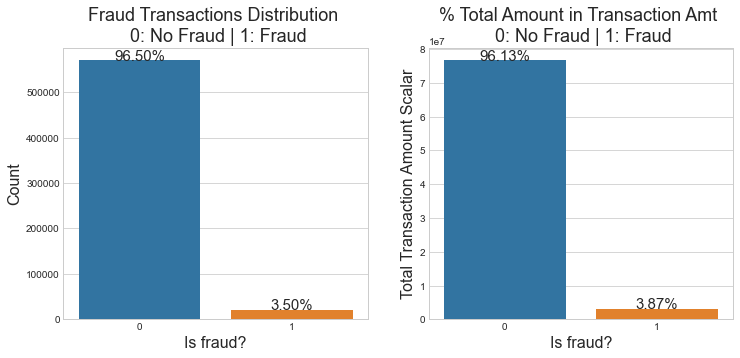

In [6]:
train_transaction['TransactionAmt'] = train_transaction['TransactionAmt'].astype(float)
total = len(train_transaction)
total_amt = train_transaction.groupby(['isFraud'])['TransactionAmt'].sum().sum()
plt.figure(figsize=(12,5))

plt.subplot(121)
plot_tr = sns.countplot(x='isFraud', data=train_transaction)
plot_tr.set_title("Fraud Transactions Distribution \n 0: No Fraud | 1: Fraud", fontsize=18)
plot_tr.set_xlabel("Is fraud?", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_amt = (train_transaction.groupby(['isFraud'])['TransactionAmt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isFraud', y='TransactionAmt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("% Total Amount in Transaction Amt \n 0: No Fraud | 1: Fraud", fontsize=18)
plot_tr_2.set_xlabel("Is fraud?", fontsize=16)
plot_tr_2.set_ylabel('Total Transaction Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)

### Add to Sub-Dataframe 

In [ ]:
df_cat['isFraud'] = train_transaction['isFraud']

## TransactionAMT 

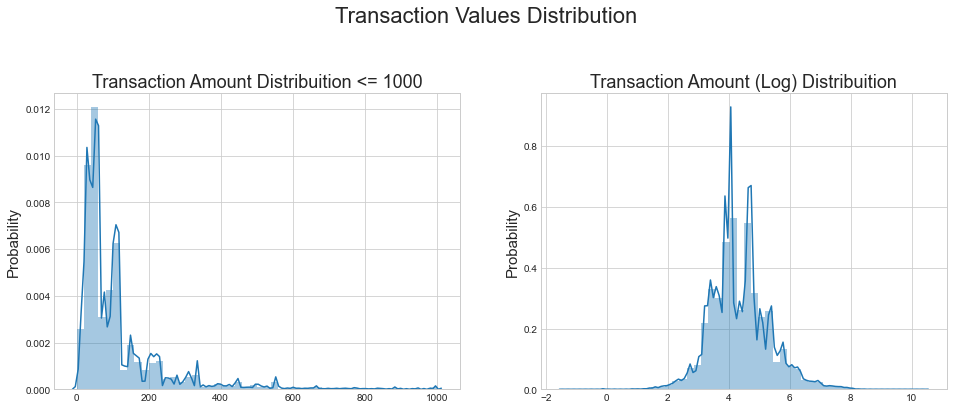

<Figure size 1152x864 with 0 Axes>

In [7]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(train_transaction[train_transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
sub_plot_1.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train_transaction['TransactionAmt']))
sub_plot_2.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))



plt.show()


In [37]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V334,V335,V336,V337,V338,V339,Date,_Weekdays,_Hours,_Days
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:00,5,0,2
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:01,5,0,2
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:09,5,0,2
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:39,5,0,2
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-02 00:01:46,5,0,2


In [7]:
df_con['TransactionAmt'] = train_transaction['TransactionAmt']
test_df_con['TransactionAmt'] = test_transaction['TransactionAmt']

### Feature: Product

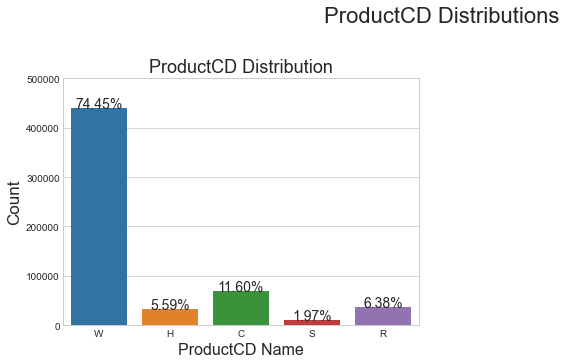

In [10]:
tmp = pd.crosstab(train_transaction['ProductCD'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('ProductCD Distributions', fontsize=22)

plt.subplot(221)
plot_1 = sns.countplot(x='ProductCD', data=train_transaction)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])

plot_1.set_title("ProductCD Distribution", fontsize=18)
plot_1.set_xlabel("ProductCD Name", fontsize=16)
plot_1.set_ylabel("Count", fontsize=17)
plot_1.set_ylim(0,500000)
for p in plot_1.patches:
    height = p.get_height()
    plot_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 





plt.show()

In [33]:
df_cat['ProductCD'] = train_transaction['ProductCD']
test_df_cat['ProductCD'] = test_transaction['ProductCD']

## Feature:  Card 1, 2, 3, 5 Distribution

In [6]:
train_transaction.loc[train_transaction.card3.isin(train_transaction.card3.value_counts()[train_transaction.card3.value_counts() < 200].index), 'card3'] = "Others"
train_transaction.loc[train_transaction.card5.isin(train_transaction.card5.value_counts()[train_transaction.card5.value_counts() < 300].index), 'card5'] = "Others"

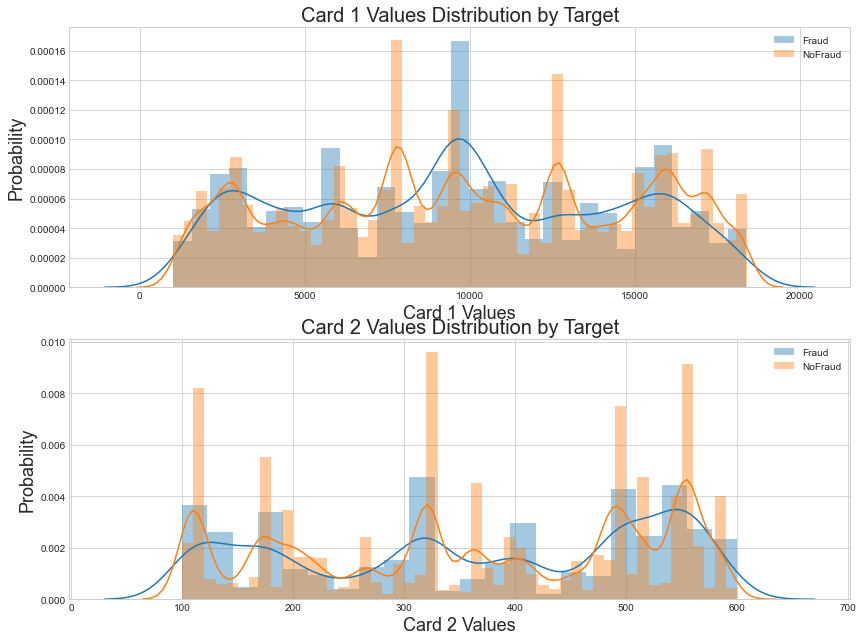

In [23]:
tmp = pd.crosstab(train_transaction['card3'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

tmp2 = pd.crosstab(train_transaction['card5'], train_transaction['isFraud'], normalize='index') * 100
tmp2 = tmp2.reset_index()
tmp2.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,22))

plt.subplot(411)
plot_1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card1'], label='Fraud')
plot_1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card1'], label='NoFraud')
plot_1.legend()
plot_1.set_title("Card 1 Values Distribution by Target", fontsize=20)
plot_1.set_xlabel("Card 1 Values", fontsize=18)
plot_1.set_ylabel("Probability", fontsize=18)

plt.subplot(412)
plot_2 = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card2'].dropna(), label='Fraud')
plot_2 = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card2'].dropna(), label='NoFraud')
plot_2.legend()
plot_2.set_title("Card 2 Values Distribution by Target", fontsize=20)
plot_2.set_xlabel("Card 2 Values", fontsize=18)
plot_2.set_ylabel("Probability", fontsize=18)






plt.show()


In [43]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V334,V335,V336,V337,V338,V339,Date,_Weekdays,_Hours,_Days
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:00,5,0,2
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:01,5,0,2
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:09,5,0,2
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:39,5,0,2
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-02 00:01:46,5,0,2


In [35]:
df_con['card1'] = train_transaction['card1']
df_con['card2'] = train_transaction['card2']
df_con['card3'] = train_transaction['card3']
df_con['card5'] = train_transaction['card5']

test_df_con['card1'] = test_transaction['card1']
test_df_con['card2'] = test_transaction['card2']
test_df_con['card3'] = test_transaction['card3']
test_df_con['card5'] = test_transaction['card5']

## Feature: Card 4 Type of Card (categorical) 

NameError: name 'total' is not defined

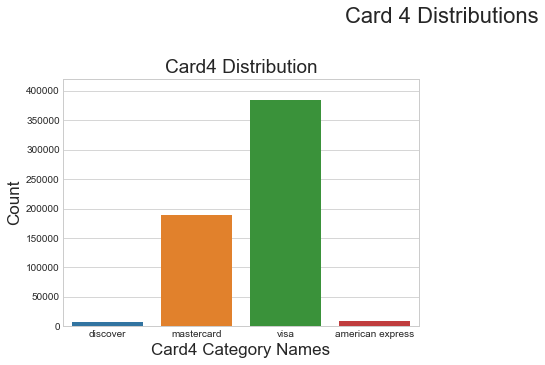

In [10]:
tmp = pd.crosstab(train_transaction['card4'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 4 Distributions', fontsize=22)

plt.subplot(221)
plot_1 = sns.countplot(x='card4', data=train_transaction)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
plot_1.set_title("Card4 Distribution", fontsize=19)
plot_1.set_ylim(0,420000)
plot_1.set_xlabel("Card4 Category Names", fontsize=17)
plot_1.set_ylabel("Count", fontsize=17)
for p in plot_1.patches:
    height = p.get_height()
    plot_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 


plt.subplot(222)
plot_2 = sns.countplot(x='card4', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
plot_2_2 = plot_1.twinx()
plot_2_2 = sns.pointplot(x='card4', y='Fraud', data=tmp, 
                   color='black', legend=False, 
                   order=['discover', 'mastercard', 'visa', 'american express'])
plot_2_2.set_ylabel("% of Fraud Transactions", fontsize=16)
plot_2.set_title("Card4 by Target(isFraud)", fontsize=19)
plot_2.set_xlabel("Card4 Category Names", fontsize=17)
plot_2.set_ylabel("Count", fontsize=17)

plt.subplot(212)
plot_3 = sns.boxenplot(x='card4', y='TransactionAmt', hue='isFraud', 
              data=train_transaction[train_transaction['TransactionAmt'] <= 2000] )
plot_3.set_title("Card 4 Distribuition by ProductCD and Target", fontsize=20)
plot_3.set_xlabel("Card4 Category Names", fontsize=17)
plot_3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [36]:
df_cat['card4'] = train_transaction['card4']
test_df_cat['card4'] = test_transaction['card4']

## Card 6 Credit or Debit (Categorical)

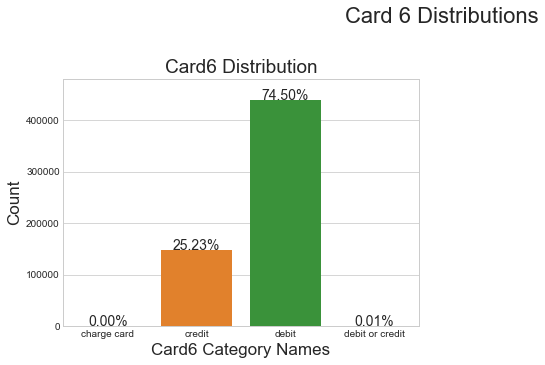

In [15]:
tmp = pd.crosstab(train_transaction['card6'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 6 Distributions', fontsize=22)

plt.subplot(221)
plot_1 = sns.countplot(x='card6', data=train_transaction, order=list(tmp.card6.values))
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
plot_1.set_title("Card6 Distribution", fontsize=19)
plot_1.set_ylim(0,480000)
plot_1.set_xlabel("Card6 Category Names", fontsize=17)
plot_1.set_ylabel("Count", fontsize=17)
for p in plot_1.patches:
    height = p.get_height()
    plot_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 



plt.show()

In [37]:
df_cat['card6'] = train_transaction['card6']
test_df_cat['card6'] = test_transaction['card6']

### Feature: Addr1 Distribution

In [17]:
train_transaction.loc[train_transaction.addr1.isin(train_transaction.addr1.value_counts()[train_transaction.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
train_transaction.loc[train_transaction.addr2.isin(train_transaction.addr2.value_counts()[train_transaction.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

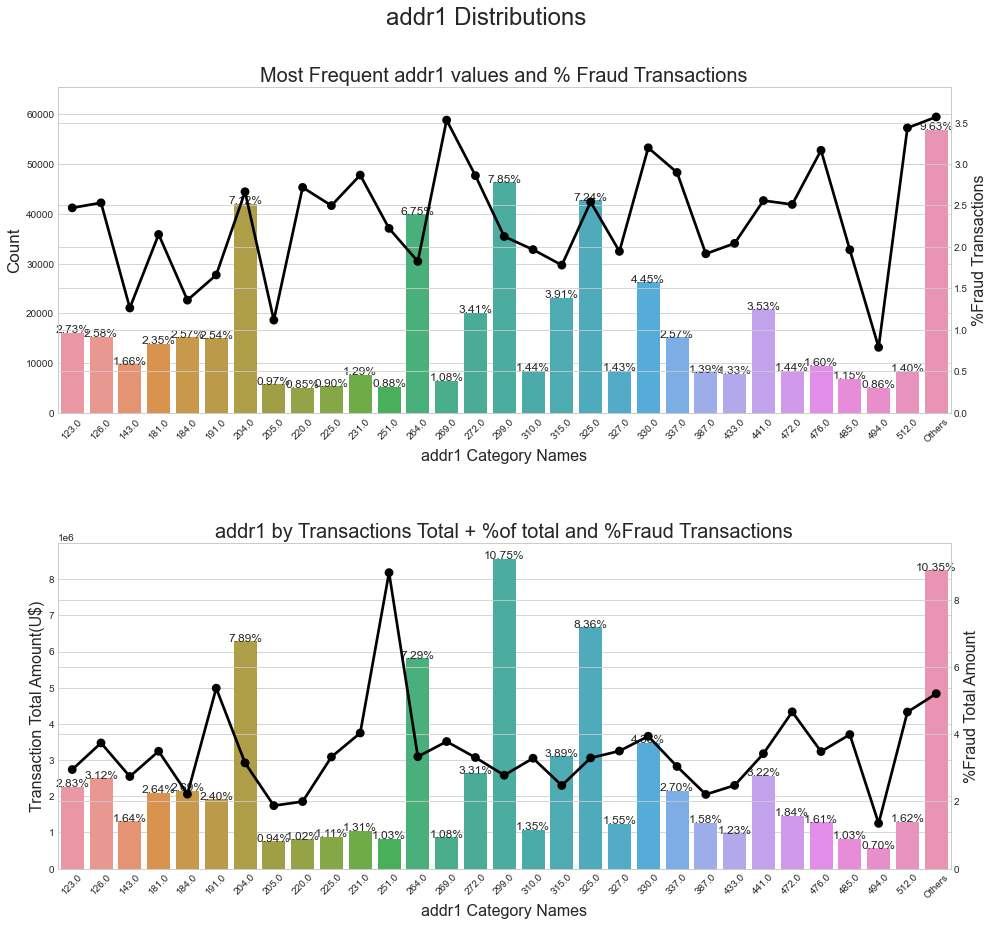

In [18]:

def ploting_cnt_amt(DataFile, Column, lim=2000):
    tmp = pd.crosstab(DataFile[Column], DataFile['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{Column} Distributions ', fontsize=24)
    
    plt.subplot(211)
    plot_1 = sns.countplot(x=Column,data=DataFile,order=list(tmp[Column].values))
    plot_1_2 = plot_1.twinx()
    plot_1_2 = sns.pointplot(x=Column, y='Fraud', data=tmp, order=list(tmp[Column].values),
                       color='black', legend=False)
    plot_1_2.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_1_2.set_ylabel("%Fraud Transactions", fontsize=16)
    plot_1.set_title(f"Most Frequent {Column} values and % Fraud Transactions", fontsize=20)
    plot_1.set_xlabel(f"{Column} Category Names", fontsize=16)
    plot_1.set_ylabel("Count", fontsize=17)
    plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot_1.patches:
        height = p.get_height()
        sizes.append(height)
        plot_1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot_1.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (DataFile.groupby(['isFraud',Column])['TransactionAmt'].sum() \
                / DataFile.groupby([Column])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = DataFile.groupby([Column])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    plot_2 = sns.barplot(x=Column, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[Column].values))
    plot_2_2 = plot_2.twinx()
    plot_2_2 = sns.pointplot(x=Column, y='Fraud', data=perc_amt, 
                        order=list(tmp[Column].values),
                       color='black', legend=False, )
    plot_2_2.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot_2_2.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)
    plot_2.set_title(f"{Column} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot_2.set_xlabel(f"{Column} Category Names", fontsize=16)
    plot_2.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)    
    
    for p in plot_2.patches:
        height = p.get_height()
        plot_2.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    
ploting_cnt_amt(train_transaction, 'addr1')

In [38]:
df_con['addr1'] = train_transaction['addr1']
df_con['addr2'] = train_transaction['addr2']

test_df_con['addr1'] = test_transaction['addr1']
test_df_con['addr2'] = test_transaction['addr2']

In [39]:
df_cat['P_emaildomain'] = train_transaction['P_emaildomain']
test_df_cat['P_emaildomain'] = test_transaction['P_emaildomain']

## Feature Engineering

In [13]:
df_cat.head(10)

,isFraud,ProductCD,card4,card6,P_emaildomain
0,0,W,discover,credit,NaN
1,0,W,mastercard,credit,gmail.com
2,0,W,visa,debit,outlook.com
3,0,W,mastercard,debit,yahoo.com
4,0,H,mastercard,credit,gmail.com
5,0,W,visa,debit,gmail.com
6,0,W,visa,debit,yahoo.com
7,0,W,visa,debit,mail.com
8,0,H,visa,debit,anonymous.com
9,0,W,mastercard,debit,yahoo.com


In [14]:
df_cat.isna().sum()

isFraud              0
ProductCD            0
card4             1577
card6             1571
P_emaildomain    94456
dtype: int64

In [15]:
df_cat['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

In [16]:
df_cat['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [16]:
df_cat['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [17]:
df_cat['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [16]:
df_cat['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [26]:
df_concat.isnull().sum()

TransactionAmt        0
card1                 0
card2              8933
card3              1565
card5              4259
addr1             65706
addr2             65706
isFraud               0
ProductCD             0
card4                 0
card6                 0
P_emaildomain         0
dtype: int64

### Adjusting Null/ Missing Values

In [12]:
#fill categorical null with mode 
df_cat['P_emaildomain'] = df_cat['P_emaildomain'].fillna(value='gmail.com')
df_cat['card4'] = df_cat['card4'].fillna(value='visa')
df_cat['card6'] = df_cat['card6'].fillna(value='debit')

#fill continous null with 
mean_df = round(df_con['card2'].mean())
mean_df2 = round(df_con['card3'].mean())
mean_df3 = round(df_con['card5'].mean())
mean_df4 = round(df_con['addr1'].mean())
mean_df5 = round(df_con['addr2'].mean())

print("Filling with mean value of {}".format(mean_df))
print("Filling with mean value of {}".format(mean_df2))
print("Filling with mean value of {}".format(mean_df3))
print("Filling with mean value of {}".format(mean_df4))
print("Filling with mean value of {}".format(mean_df5))

df_con['card2'] = df_con['card2'].fillna(mean_df)
df_con['card3'] = df_con['card3'].fillna(mean_df2)
df_con['card5'] = df_con['card5'].fillna(mean_df3)
df_con['addr1'] = df_con['addr1'].fillna(mean_df4)
df_con['addr2'] = df_con['addr2'].fillna(mean_df5)

Filling with mean value of 363
Filling with mean value of 153
Filling with mean value of 199
Filling with mean value of 291
Filling with mean value of 87


In [13]:
cat_cols = df_cat.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(df_cat[col].nunique())
    print('--------------------------')

Number of classes in ProductCD
5
--------------------------
Number of classes in card4
4
--------------------------
Number of classes in card6
4
--------------------------
Number of classes in P_emaildomain
59
--------------------------


In [14]:
#Card 4, 6 ,and email domain label encoding 
cat_cols = ['ProductCD','card4', 'card6','P_emaildomain']
encoder = ce.OrdinalEncoder(cols=cat_cols)
df_cat = encoder.fit_transform(df_cat)


#Concatenate df_cat and df_con 
df_concat = pd.concat([df_con,  
                        df_cat], axis=1)

## Machine Learning Models

In [84]:
df_concat.isFraud

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [15]:
# Split the dataframe i
X_train = df_concat 

y_train = df_concat.isFraud 

#y_train = df_concat['isFraud']

In [18]:
df_concat

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,isFraud,ProductCD,card4,card6,P_emaildomain
0,68.50,13926,NaN,150.0,142.0,315.0,87.0,0,1,1,1,1
1,29.00,2755,404.0,150.0,102.0,325.0,87.0,0,1,2,1,1
2,59.00,4663,490.0,150.0,166.0,330.0,87.0,0,1,3,2,2
3,50.00,18132,567.0,150.0,117.0,476.0,87.0,0,1,2,2,3
4,50.00,4497,514.0,150.0,102.0,420.0,87.0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
590535,49.00,6550,NaN,150.0,226.0,272.0,87.0,0,1,3,2,1
590536,39.50,10444,225.0,150.0,224.0,204.0,87.0,0,1,2,2,1
590537,30.95,12037,595.0,150.0,224.0,231.0,87.0,0,1,2,2,1
590538,117.00,7826,481.0,150.0,224.0,387.0,87.0,0,1,2,2,8


## Function to fit machine learning model

In [17]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [18]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 96.46
Accuracy CV 10-Fold: 96.19
Running Time: 0:00:21.552403


## K Nearest Neighbor

In [19]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 98.08
Accuracy CV 10-Fold: 96.71
Running Time: 0:00:53.474648


## Gaussian Naive Bayes

In [20]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 99.45
Accuracy CV 10-Fold: 99.45
Running Time: 0:00:01.657051


## Linear Support Vector Machines (SVC)

In [21]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 99.99
Accuracy CV 10-Fold: 99.32
Running Time: 0:07:18.132841


## Stochastic Gradient Descent 

In [22]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 96.68
Accuracy CV 10-Fold: 96.58
Running Time: 0:02:55.192775


## Decision Tree Classifier

In [18]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 100.0
Running Time: 0:00:03.575501


## Gradient Boosting Trees

In [24]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 100.0
Running Time: 0:02:52.408877


# Model Results
Which model had the best cross-validation accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

## Regular accuarcy scores

In [28]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,100.00
4,Linear SVC,99.99
2,Naive Bayes,99.45
0,KNN,98.08
3,Stochastic Gradient Decent,96.68
1,Logistic Regression,96.46


In [29]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,100.00
2,Naive Bayes,99.45
4,Linear SVC,99.32
0,KNN,96.71
3,Stochastic Gradient Decent,96.58
1,Logistic Regression,96.19


## Feature Importance 

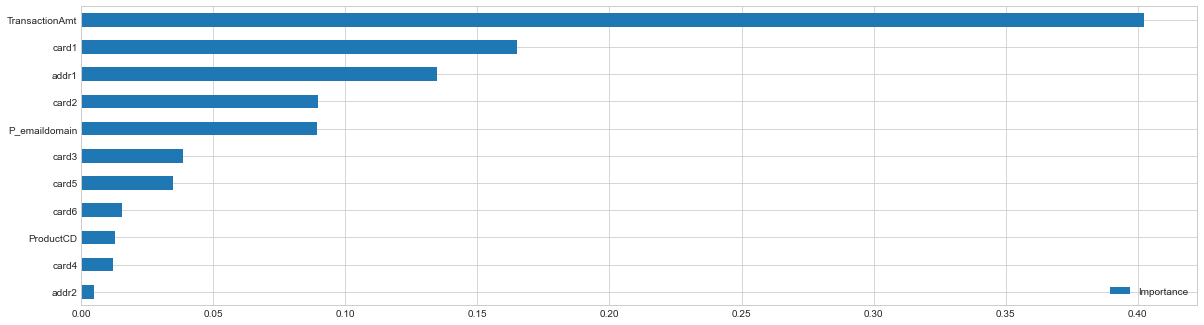

In [64]:
# Using Random Forest to gain an insight on Feature Importance
clt = DecisionTreeClassifier()
clt.fit(df_concat.drop('isFraud', axis=1), df_concat['isFraud'])

plt.style.use('seaborn-whitegrid')
importance = clt.feature_importances_
importance = pd.DataFrame(importance, index=df_concat.drop('isFraud', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

## Precision and Recall

In [63]:
print(metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    569877
           1       1.00      1.00      1.00     20663

    accuracy                           1.00    590540
   macro avg       1.00      1.00      1.00    590540
weighted avg       1.00      1.00      1.00    590540

